In [1]:
import numpy as np
from tensorflow import keras 
from matplotlib import pyplot as plt
import seaborn as sn

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

# We can do Scaling to get number between 0 and 1

In [ ]:
x_train = x_train / 255
x_test = x_test / 255


9


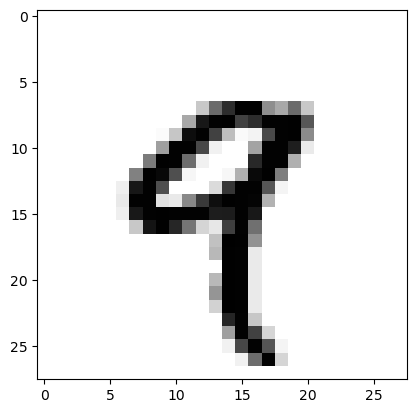

In [16]:
index = 4
plt.imshow(x_train[index],cmap=plt.cm.binary)
print(y_train[index])

In [17]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [18]:
x_train_flat.shape

(60000, 784)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy' ]
)
model.fit(x_train_flat, y_train, epochs=5)


/opt/anaconda3/envs/stopic/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7917 - loss: 0.8929
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9635 - loss: 0.1369
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9762 - loss: 0.0838
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9827 - loss: 0.0604
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9870 - loss: 0.0449


In [25]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9700 - loss: 0.1019


[0.08757033944129944, 0.9736999869346619]

In [26]:
y_pred = model.predict(x_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


In [28]:
import tensorflow as tf

<Axes: >

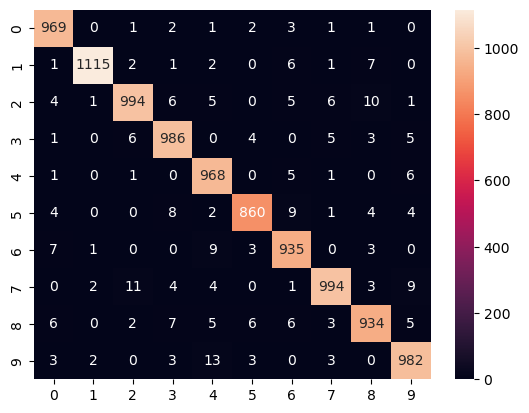

In [29]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
sn.heatmap(confusion_matrix, annot=True, fmt='d')